Bankruptcy Prediction Analysis

In [106]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [107]:
#url = "https://raw.githubusercontent.com/adam-datasci/RiskAnalytics/main/Data/american_bankruptcy.csv?"
url = "Data/american_bankruptcy_normalized.csv"
df = pd.read_csv(url)

In [108]:
features = [
    'wc_to_ta_pct',
    're_to_ta_pct',
    'ebit_to_ta_pct',
    'mv_to_tl_pct',
    'tr_to_ta_pct',
    'tltd_to_te_pct',
    'np_to_tr_pct',
    'ebitda_to_tr_pct',
    'gp_to_tr_pct',
    'ca_to_cl_pct',
    'np_to_ta_pct',
    'default'
    ]

industries = ['Agriculture','Mining','Construction','Manufacturing','Transportation','Wholesale','Retail','Finance','Services','Public']
industries = ['Manufacturing']

df_filtered = df[df['Division'].isin(industries)]
df_filtered = df_filtered[features]

In [109]:
#Create a sample of a specific size for the filtered data
sample_size = 1000
df_filtered_sample = df_filtered.sample(sample_size, random_state=1)

#pull out both the default and non-default periods
default_periods = df_filtered[df['default'] == 1]
non_default_periods = df_filtered[df['default'] == 0]
no_rows = default_periods.shape[0]

#Create a balanced dataset
df_sample_non_default = non_default_periods.sample(no_rows, random_state=1)
df_balanced = pd.concat([default_periods, df_sample_non_default])

X = df_balanced.drop('default', axis=1)
y = df_balanced['default']

C:\Users\adamk\AppData\Local\Temp\ipykernel_14168\1723107776.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  default_periods = df_filtered[df['default'] == 1]
C:\Users\adamk\AppData\Local\Temp\ipykernel_14168\1723107776.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_default_periods = df_filtered[df['default'] == 0]


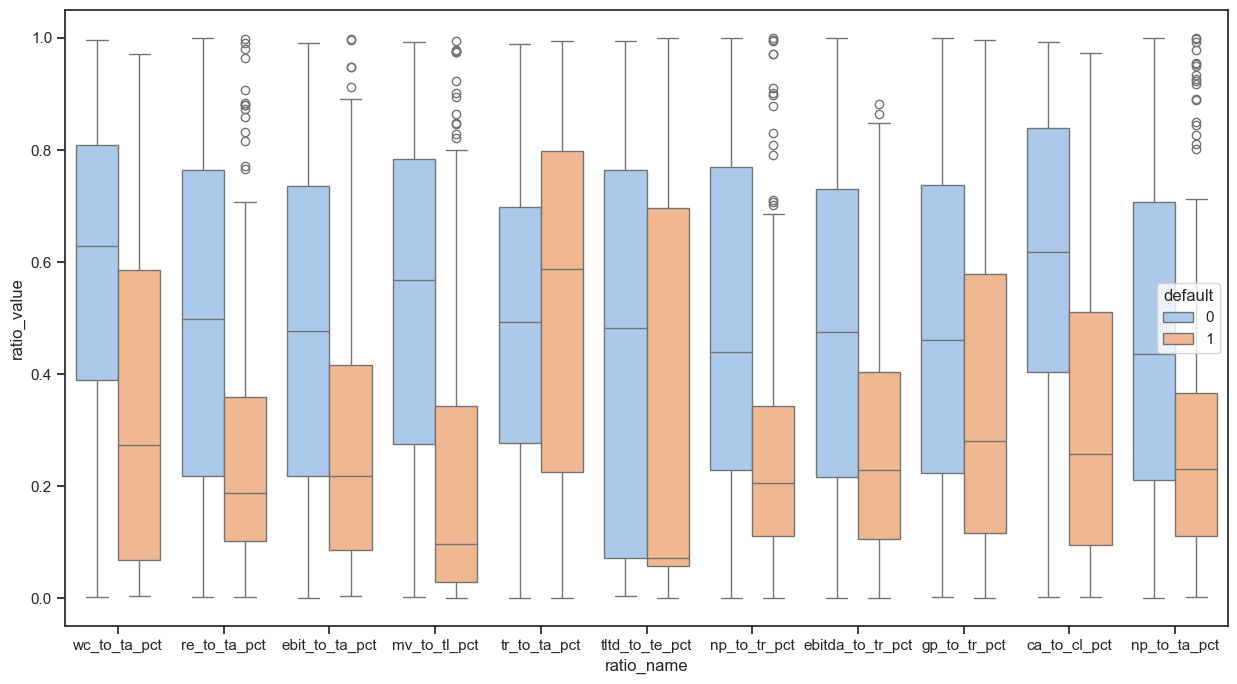

In [110]:
df_filtered_sample_by_status = df_balanced.melt(id_vars='default', value_vars=features[:-1],var_name='ratio_name',value_name='ratio_value')

plt.figure(figsize=(15, 8))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='default', data=df_filtered_sample_by_status)
plt.show()

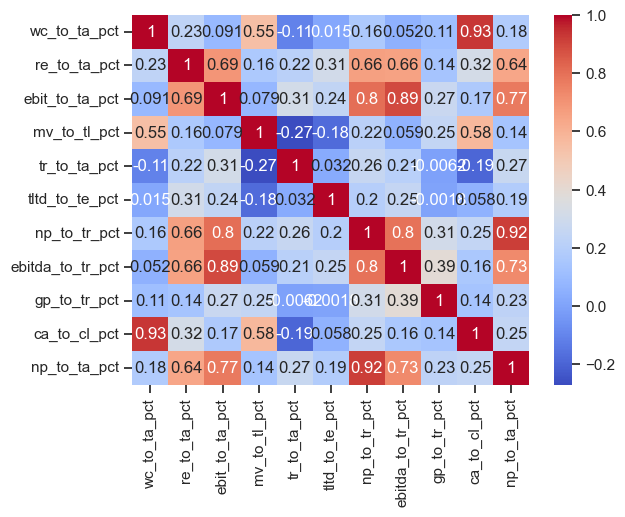

In [111]:
correlation_matrix = X.corr()

# Heatmap of the correlation matrix
dataplot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [113]:
#model = sm.Logit(y_train, X_train)
#result = model.fit(
model = XGBClassifier(learning_rate =0.1, randon_state=42)
result = model.fit(X_train,y_train)

c:\Users\adamk\anaconda3\envs\main\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


In [114]:
predictions = result.predict_proba(X_test)
predicted_classes = (predictions > 0.5).astype(int)

In [115]:
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
result.summary()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()